In [1]:
from urllib.request import urlretrieve

URL='https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
# download data from URL and call it Fremont.csv
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x1103c87f0>)

In [7]:
import pandas as pd
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates = True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


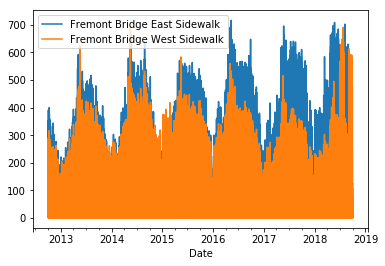

In [11]:
%matplotlib inline
data.plot()

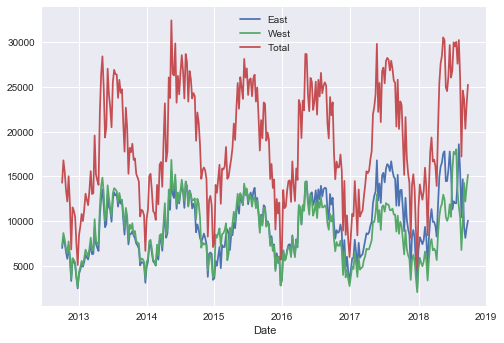

In [25]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
data.resample('W').sum().plot() # weekly data, sum the hours within each week
# upsampling vs downsampling?

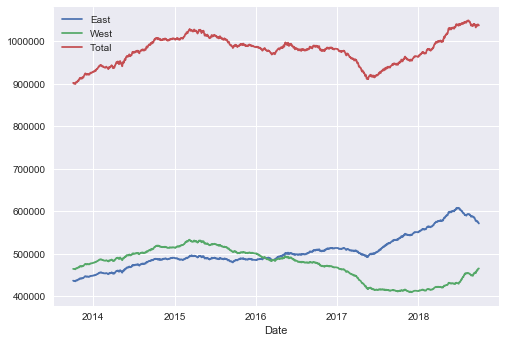

In [29]:
data.resample('D').sum().rolling(365).sum().plot() # sum of every hour for the day, then doing a rolling sum of days

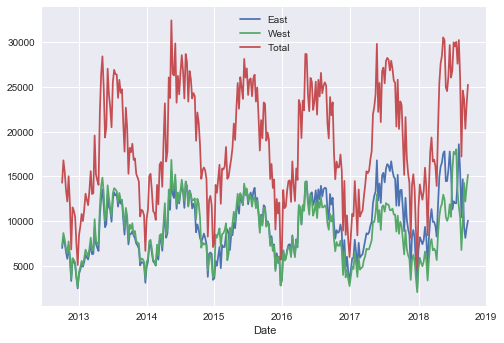

In [31]:
data.resample('W').sum().plot()
# looks like big fluctuations

(0, 618365.35)

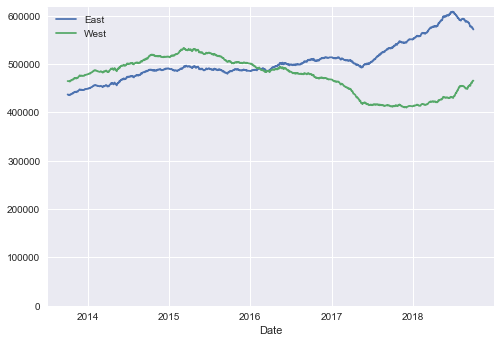

In [18]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None) # set y axis to start at 0

(0, 1080850.45)

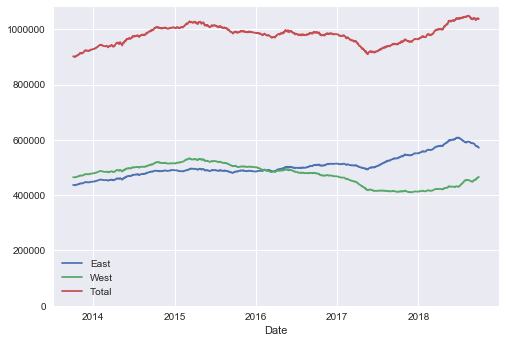

In [22]:
data['Total'] = data['West'] + data['East']
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

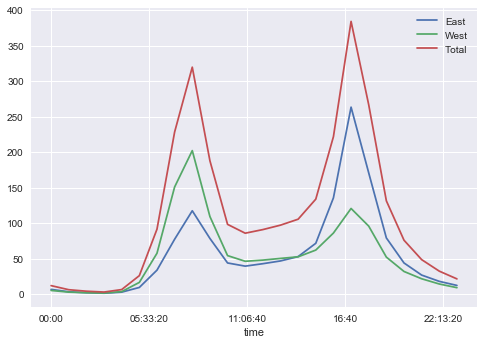

In [26]:
data.groupby(data.index.time).mean().plot() # grouping all of the data for each particular hour, across all days/wk/yr

In [32]:
pivoted = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
pivoted.iloc[:5, :5] # just show a few rows and a few columns
# now each row is an hour of the day and each column is a day

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


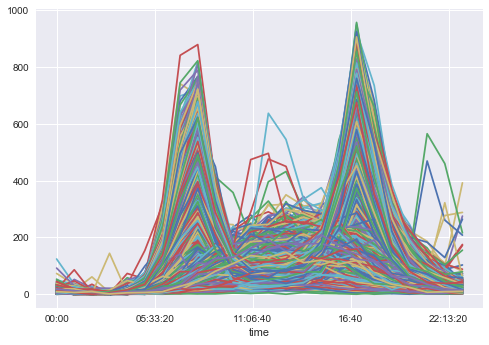

In [34]:
pivoted.plot(legend = False)

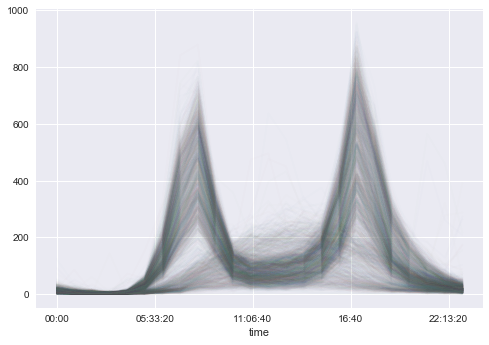

In [36]:
pivoted.plot(legend = False, alpha = 0.01)

In [40]:
pivoted_east = data.pivot_table('East', index = data.index.time, columns = data.index.date)
pivoted_east.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,9.0,11.0,7.0,7.0,5.0
01:00:00,6.0,0.0,4.0,5.0,5.0
02:00:00,1.0,6.0,3.0,2.0,1.0
03:00:00,3.0,3.0,2.0,2.0,2.0
04:00:00,1.0,1.0,2.0,1.0,2.0


In [41]:
pivoted_west = data.pivot_table('West', index = data.index.time, columns = data.index.date)
pivoted_west.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,4.0,7.0,4.0,8.0,6.0
01:00:00,4.0,3.0,4.0,10.0,12.0
02:00:00,1.0,3.0,4.0,7.0,2.0
03:00:00,2.0,0.0,2.0,1.0,4.0
04:00:00,6.0,7.0,7.0,4.0,1.0


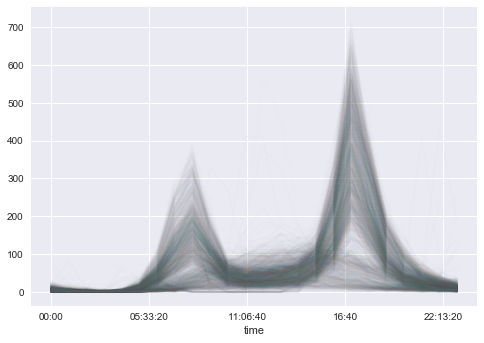

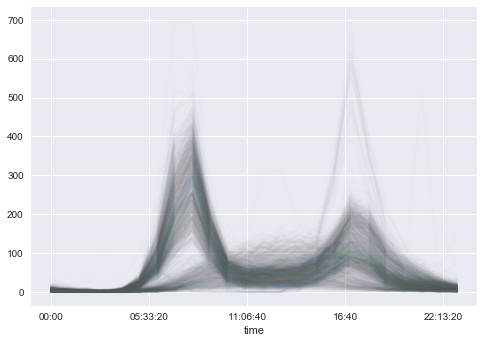

In [42]:
pivoted_east.plot(legend = False, alpha = 0.01)
pivoted_west.plot(legend = False, alpha = 0.01)